<a href="https://colab.research.google.com/github/melihkurtaran/Bank_Marketing/blob/main/TOM_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Connect to GitHub for faster access
!git clone https://github.com/melihkurtaran/Bank_Marketing.git

Cloning into 'Bank_Marketing'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (10/10), 630.17 KiB | 6.43 MiB/s, done.
Resolving deltas: 100% (1/1), done.


Show the explanation

In [3]:
file_path = 'Bank_Marketing/bank-additional-names.txt'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Read the contents of the file
    file_contents = file.read()

    # Print the contents
    print(file_contents)


﻿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This

In [4]:
file_path = 'Bank_Marketing/bank-additional-full.csv'
df = pd.read_csv(file_path, delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
# Count the number of examples in each class
class_counts = df['y'].value_counts()

# Calculate the imbalance ratio
imbalance_ratio = class_counts[1] / class_counts[0]

# Calculate the imbalance percentage
imbalance_percentage = (class_counts[1] / df.shape[0]) * 100

print("Class Counts:")
print(class_counts)
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
print(f"Imbalance Percentage: {imbalance_percentage:.2f}%")

Class Counts:
no     36548
yes     4640
Name: y, dtype: int64
Imbalance Ratio: 0.13
Imbalance Percentage: 11.27%



These counts show the number of instances belonging to each class in the binary classification problem. In this case, "no" represents clients who did not subscribe to a bank term deposit, and "yes" represents clients who did subscribe.

**Imbalance Ratio: 0.13**

The imbalance ratio is calculated as the ratio of the number of instances in the minority class ("yes") to the number of instances in the majority class ("no").
In this dataset, the imbalance ratio is approximately 0.13, indicating that the minority class ("yes") is about 0.13 times smaller than the majority class ("no").

**Imbalance Percentage: 11.27%**

The imbalance percentage is calculated as the proportion of instances in the minority class ("yes") relative to the total number of instances in the dataset.
In this dataset, the imbalance percentage is approximately 11.27%, which means that the "yes" class accounts for approximately 11.27% of all instances in the dataset, while the "no" class represents the remaining 88.73%.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Missing values

In [7]:
categorical_columns_with_unknown = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

# Count "unknown" values in each categorical column
unknown_counts = {}
for column in categorical_columns_with_unknown:
    unknown_counts[column] = (df[column] == "unknown").sum()

# Display the counts of "unknown" values
print("Unknown Value Counts:")
for column, count in unknown_counts.items():
    print(f"{column}: {count}")

Unknown Value Counts:
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990
contact: 0
month: 0
day_of_week: 0
poutcome: 0


# **EDA**

Distribution of Target Variable

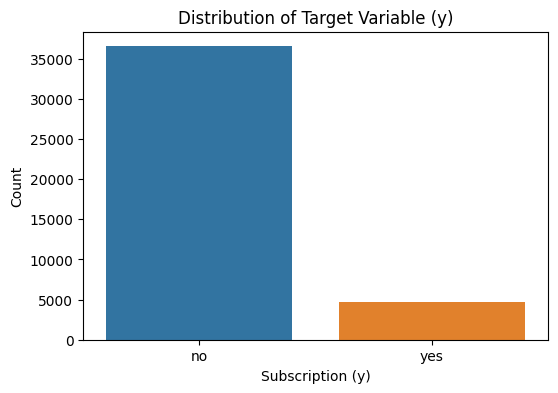

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscription (y)')
plt.ylabel('Count')
plt.show()


Age Distribution

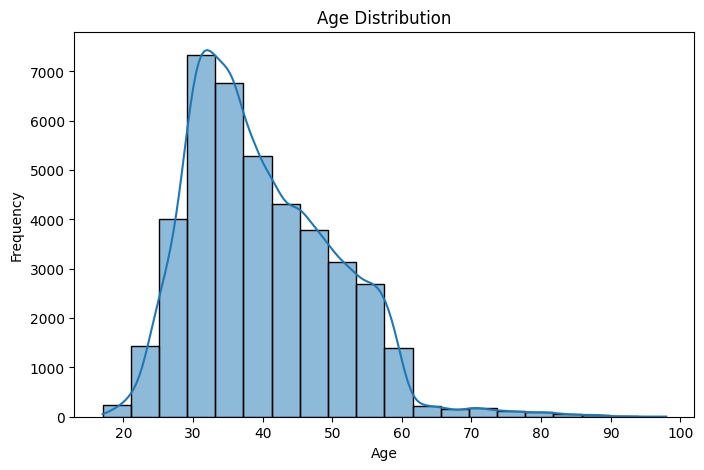

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Job Categories

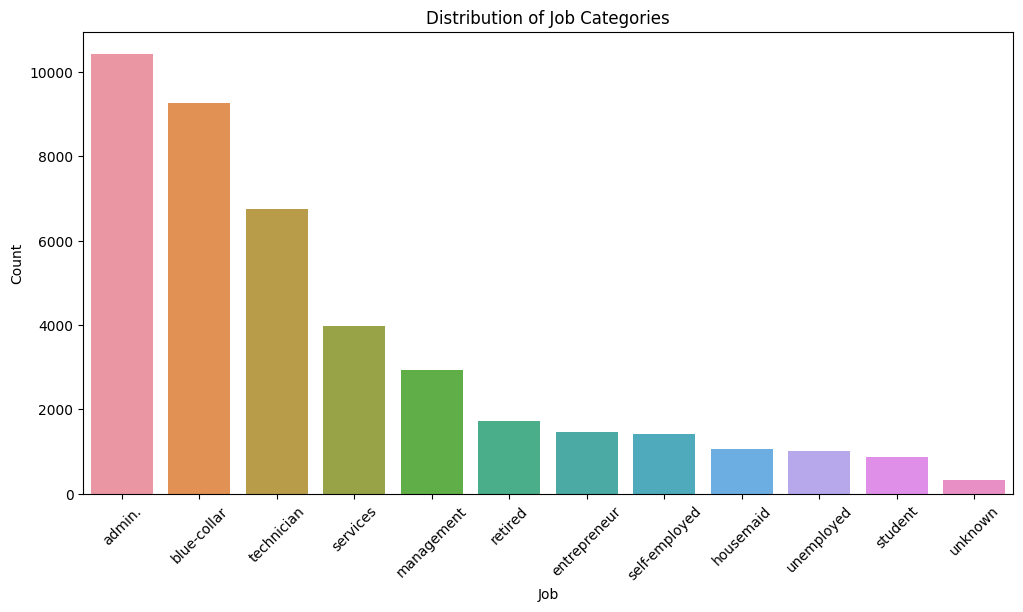

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Distribution of Job Categories')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of Ages by Occupation

In [33]:
import plotly.express as px

# Filter the DataFrame for subscribers
subscribed_df = df[df["y"] == "yes"]

# Create a box plot
fig = px.box(subscribed_df, x="job", y="age", color="job")

# Customize the layout
fig.update_layout(
    title="Distribution of Ages by Occupation",
    xaxis_title="Occupation",
    yaxis_title="Age",
    showlegend=False
)

# Show the plot
fig.show()


Marital Status Distribution

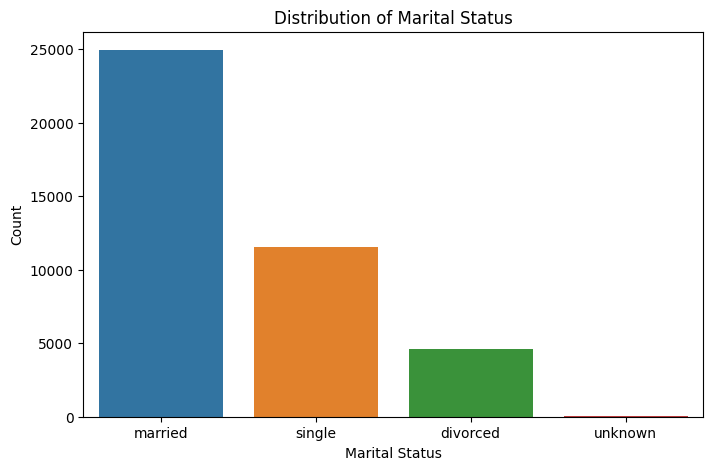

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

Education Levels

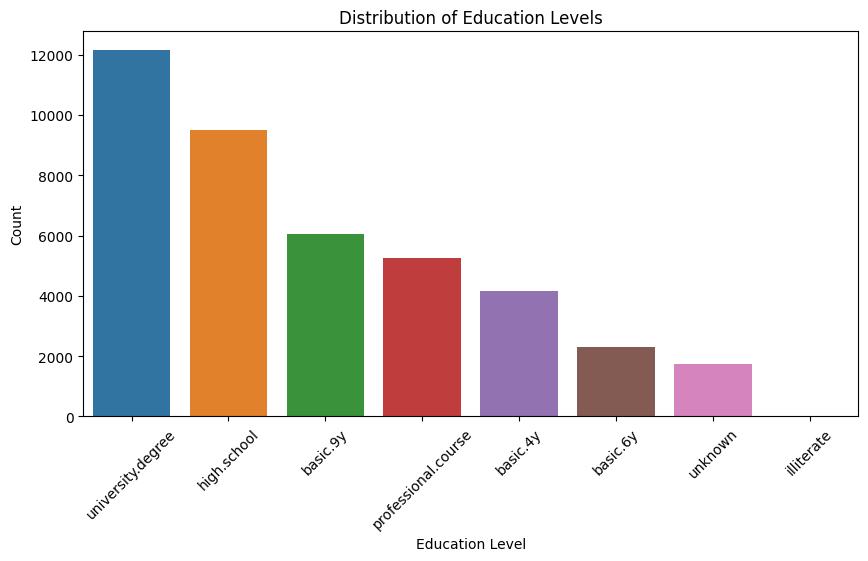

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Stacked bar charts to visualize the distribution of clients with credit in default, housing loans, and personal loans.

In [19]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

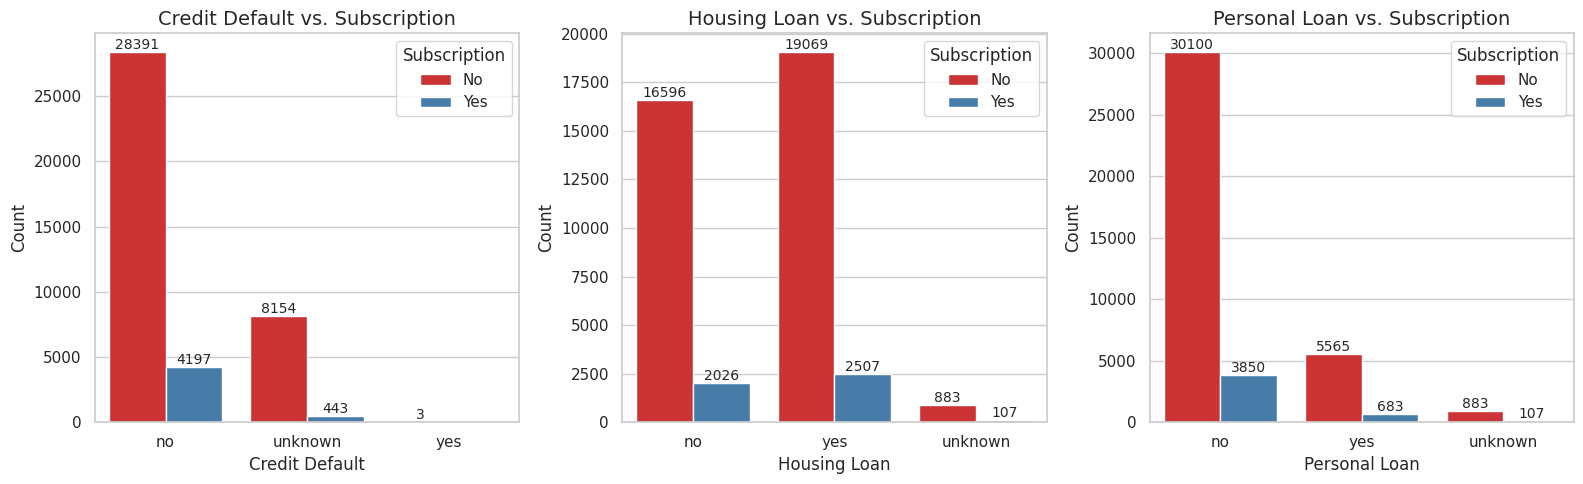

In [23]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Credit Default vs. Subscription
sns.countplot(data=df, x='default', hue='y', ax=axes[0], palette='Set1')
axes[0].set_title('Credit Default vs. Subscription', fontsize=14)
axes[0].set_xlabel('Credit Default', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Subscription', labels=['No', 'Yes'])

# Annotate counts for Plot 1
for p in axes[0].patches:
    height = p.get_height()
    if not height:
        continue
    x = p.get_x() + p.get_width() / 2.
    axes[0].annotate(f'{int(height)}', (x, height), ha='center', va='bottom', fontsize=10)

# Plot 2: Housing Loan vs. Subscription
sns.countplot(data=df, x='housing', hue='y', ax=axes[1], palette='Set1')
axes[1].set_title('Housing Loan vs. Subscription', fontsize=14)
axes[1].set_xlabel('Housing Loan', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend(title='Subscription', labels=['No', 'Yes'])

# Annotate counts for Plot 2
for p in axes[1].patches:
    height = p.get_height()
    if not height:
        continue
    x = p.get_x() + p.get_width() / 2.
    axes[1].annotate(f'{int(height)}', (x, height), ha='center', va='bottom', fontsize=10)

# Plot 3: Personal Loan vs. Subscription
sns.countplot(data=df, x='loan', hue='y', ax=axes[2], palette='Set1')
axes[2].set_title('Personal Loan vs. Subscription', fontsize=14)
axes[2].set_xlabel('Personal Loan', fontsize=12)
axes[2].set_ylabel('Count', fontsize=12)
axes[2].legend(title='Subscription', labels=['No', 'Yes'])

# Annotate counts for Plot 3
for p in axes[2].patches:
    height = p.get_height()
    if not height:
        continue
    x = p.get_x() + p.get_width() / 2.
    axes[2].annotate(f'{int(height)}', (x, height), ha='center', va='bottom', fontsize=10)

# Adjust spacing
plt.tight_layout()

# Show the subplots
plt.show()


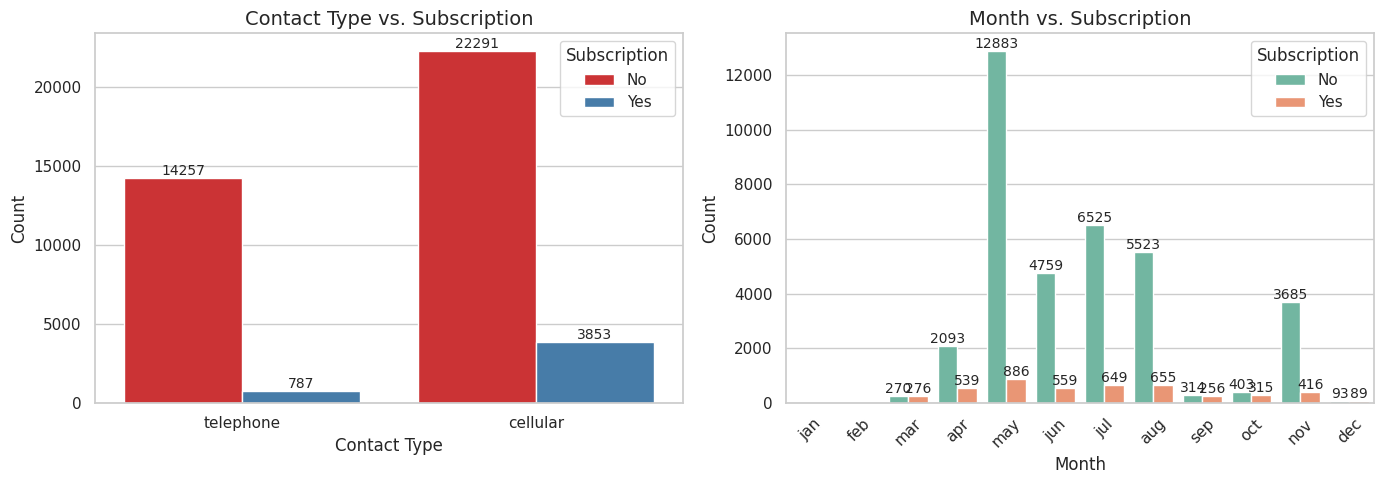

In [25]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Contact Type vs. Subscription
sns.countplot(data=df, x='contact', hue='y', ax=axes[0], palette='Set1')
axes[0].set_title('Contact Type vs. Subscription', fontsize=14)
axes[0].set_xlabel('Contact Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Subscription', labels=['No', 'Yes'])

# Annotate counts for Plot 1
for p in axes[0].patches:
    height = p.get_height()
    if not height:
        continue
    x = p.get_x() + p.get_width() / 2.
    if not pd.isna(height):
        axes[0].annotate(f'{int(height)}', (x, height), ha='center', va='bottom', fontsize=10)

# Plot 2: Month vs. Subscription
sns.countplot(data=df, x='month', hue='y', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ax=axes[1], palette='Set2')
axes[1].set_title('Month vs. Subscription', fontsize=14)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Subscription', labels=['No', 'Yes'])

# Annotate counts for Plot 2 (skip NaN values)
for p in axes[1].patches:
    height = p.get_height()
    if not height:
        continue
    x = p.get_x() + p.get_width() / 2.
    if not pd.isna(height):
        axes[1].annotate(f'{int(height)}', (x, height), ha='center', va='bottom', fontsize=10)

# Adjust spacing
plt.tight_layout()

# Show the subplots
plt.show()


Let's see the effect of previous campaign outcome to our target value subscription to our new campaign

85.7714016933208
91.16778674465034
34.8871085214858
14.228598306679203
8.832213255349657
65.1128914785142


<Figure size 1000x600 with 0 Axes>

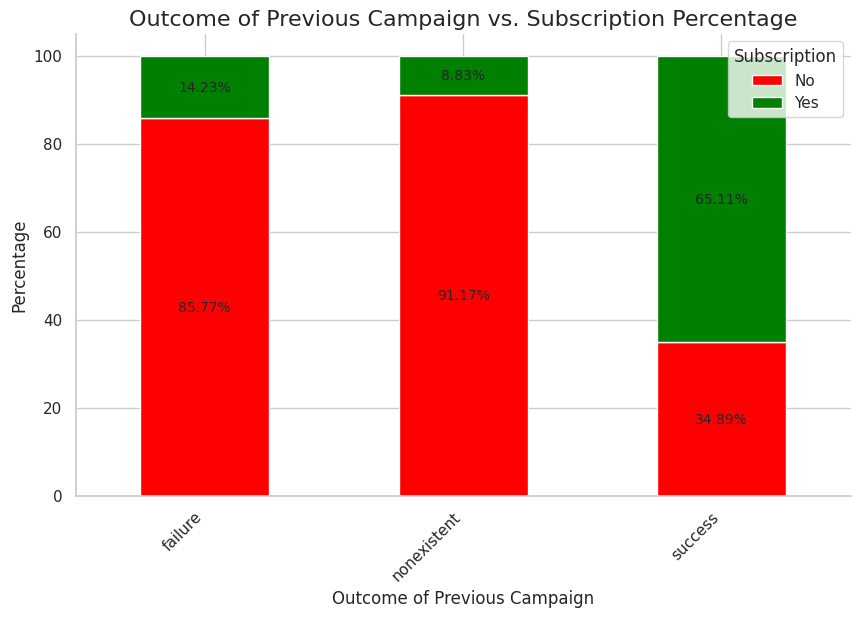

In [15]:
# Calculate percentages for each category of "poutcome"
percentage_df = df.groupby('poutcome')['y'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Create a bar chart with percentages
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')  # Set a whitegrid background style
ax = percentage_df.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))
plt.title('Outcome of Previous Campaign vs. Subscription Percentage', fontsize=16)
plt.xlabel('Outcome of Previous Campaign', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Subscription', labels=['No', 'Yes'])  # Add a legend with clear labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
sns.despine()  # Remove the top and right spines

# Annotate the percentages on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    if height > 0:
        ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)
        print(height)

plt.show()


The outcome of the previous campaign ("poutcome") is a significant factor in predicting whether a client will subscribe to a term deposit. Clients with a previous campaign outcome of "Failure" or "Nonexistent" are less likely to subscribe, while those with a previous campaign outcome of "Success" are more likely to subscribe.

Campaign Success Rate Comparison

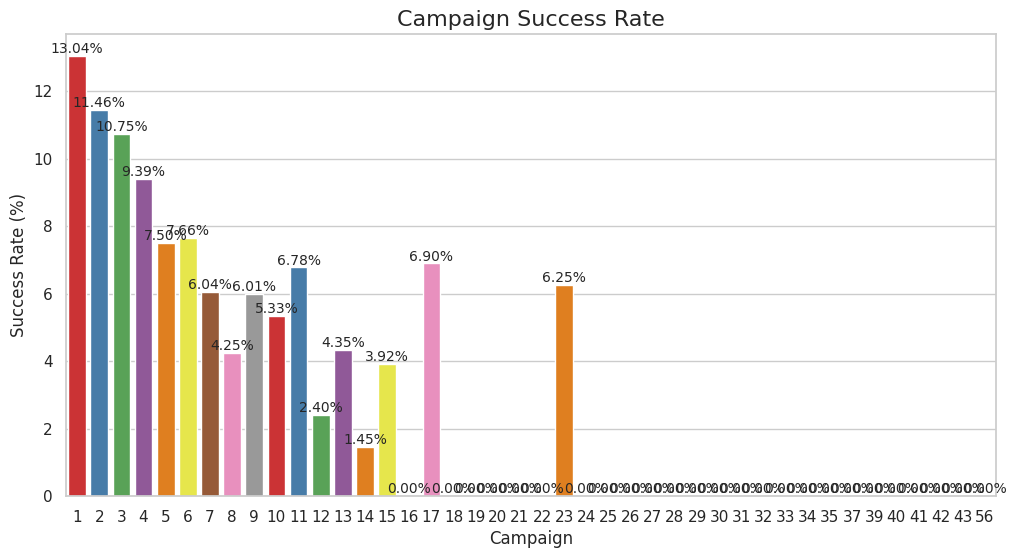

In [29]:
# Calculate the success rate for each campaign
campaign_success_rate = df.groupby('campaign')['y'].value_counts(normalize=True).unstack(fill_value=0)['yes'] * 100

# Create a bar plot to visualize the success rates
plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_success_rate.index, y=campaign_success_rate.values, palette='Set1')
plt.title('Campaign Success Rate', fontsize=16)
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.xticks(rotation=0)

# Annotate the bars with percentage values
for i, v in enumerate(campaign_success_rate.values):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()


We see that for successful campaigns we have longer call duration

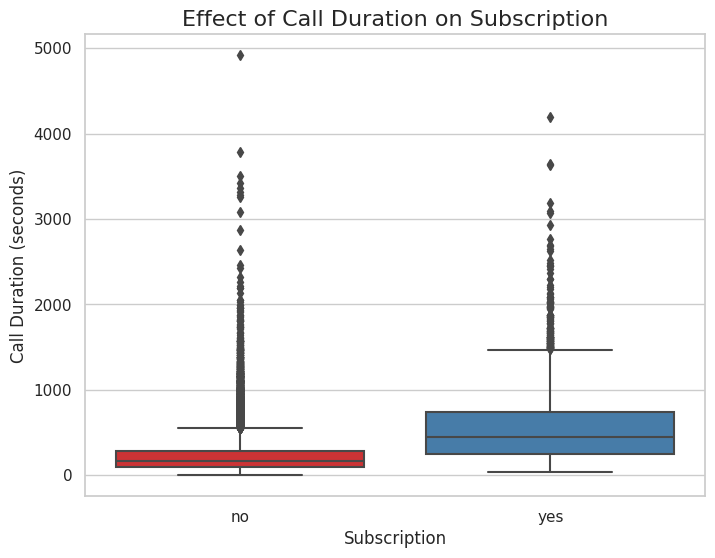

In [36]:
# Create a box plot to visualize the effect of 'duration' on the target variable
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='y', y='duration', palette='Set1')
plt.title('Effect of Call Duration on Subscription', fontsize=16)
plt.xlabel('Subscription', fontsize=12)
plt.ylabel('Call Duration (seconds)', fontsize=12)

# Show the plot
plt.show()


In [ ]:
df